# Generating Buy/Sell/Hold signals

#### We will be using the following libraries in this task:

- Pandas: Pandas is the most widely used data storage and manipulation library. We import, store, process and save our data in the form of Pandas DataFrames.


- NumPy: Numpy is the python library to store and form n-dimensional arrays which are used to build, train and test machine learning models.


- Matplotlib and Seaborn: These two libraries are used for data visualization. Matplotlib makes graphs of all sorts, and seaborn is an extension to it to make graphs more visually appealing.


- SciKitLearn: SKlearn is a data preprocessing library which we would use for train test splits and data scaling.


- Tensorflow and Keras: Tensorflow is the most powerful library for deep learning tasks with built in methods to train and test models. Keras is a high-level Tensorflow API to build and run deep learning models with ease and lesser code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow_docs as tfdocs
from keras.optimizers import adam
from keras.utils import plot_model
from tensorflow import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler


We import a random company and generate it's signals

In [6]:
inputs = pd.read_csv('Input/MCB PA Equity.csv')
inputs = inputs.rename(columns={"14 RSI": "RSI"})
inputs.head()

,Unnamed: 0,Date,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,MACD Signal,MACD Trend,Score
0,0,2014-12-30,194.69861,197.3591,189.996986,185.557970,182.905628,182.266565,66.866216,465123.809524,198.757829,190.109860,181.461891,195.2207,146.9217,2.371722,1.530283,Bullish,0.0
1,1,2014-12-31,196.58453,197.4625,190.459986,185.857978,183.065458,182.511701,67.005659,474752.380952,199.738867,190.568550,181.398233,197.3591,146.9217,2.663398,1.756906,Bullish,0.0
2,2,2015-01-01,197.27960,199.6138,190.999276,186.198970,183.246801,182.739400,69.848771,459938.095238,200.963205,190.980725,180.998245,197.4625,146.9217,3.033181,2.012161,Bullish,0.0
3,3,2015-01-02,195.93962,201.5002,191.481652,186.605504,183.447386,182.967082,72.117601,454000.000000,202.452939,191.466225,180.479511,199.6138,146.9217,3.438813,2.297491,Bullish,0.0
4,4,2015-01-05,199.34735,199.7107,191.858819,186.969614,183.644315,183.182137,66.969394,436423.809524,203.383888,191.826715,180.269542,201.5002,146.9217,3.574674,2.552928,Bullish,0.0


In [3]:
inputs.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,21 SMA,50 SMA,100 SMA,200 SMA,...,52-week low,21-avg volume,First Resistance,Second Resistance,Third Resistance,First Support,Second Support,Third Support,Score,Predicted Price
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1.404000e+03,1404.000000,1404.000000,1404.000000,1404.000000,...,1404.000000,1.404000e+03,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,4455.500000,165.418949,167.348372,163.277293,165.184067,5.963544e+05,165.193302,165.211566,165.467193,166.492411,...,141.381133,5.942470e+05,167.262528,169.340989,171.333607,163.191450,161.198832,159.120371,0.008729,165.540261
std,405.444201,14.018414,14.046863,13.832229,13.958725,7.002335e+05,12.914198,11.714658,9.970650,8.208864,...,8.645599,3.469954e+05,14.073842,14.288694,14.624031,13.860478,13.864443,13.999347,0.609818,13.779839
min,3754.000000,126.395200,131.528400,126.104600,128.710000,1.430000e+02,135.544319,137.164696,141.229956,148.609403,...,128.710000,1.410857e+05,131.272033,131.922167,132.315933,124.713133,119.718667,113.332733,-1.000000,131.711730
25%,4104.750000,156.783500,158.905125,154.755250,156.606500,2.108500e+05,157.909354,157.803054,158.888006,163.147779,...,130.621900,3.676940e+05,158.718983,160.715033,162.283558,154.776317,152.691483,150.066658,-0.500000,157.086038
50%,4455.500000,164.663900,166.310100,162.902300,164.574600,3.927000e+05,164.352771,165.859002,167.139823,167.620439,...,145.635100,5.083238e+05,166.236383,168.296883,170.213183,162.800900,160.942500,158.850717,0.000000,164.957035
75%,4806.250000,173.581575,175.219950,171.500000,173.161600,7.227000e+05,172.773156,172.357459,171.505733,170.274311,...,149.615100,7.209690e+05,175.246208,177.362592,179.532708,171.533217,169.648542,167.872533,0.538462,173.527347
max,5157.000000,211.217500,212.877400,209.425500,211.651300,1.171720e+07,206.786957,201.980324,192.733466,185.872419,...,155.131100,2.517467e+06,213.855100,216.058900,219.240400,209.224333,207.781367,206.184333,1.000000,211.489600


We preprocess the data by changing data types and doing some feature engineering.

In [8]:
def correct_dtype(inputs):

    inputs['Close'] = pd.to_numeric(inputs['Original Price'])
    inputs['Score'] = pd.to_numeric(inputs['Score'])
    
    return inputs

inputs = correct_dtype(inputs)
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1508 non-null   int64  
 1   Date             1508 non-null   object 
 2   Predicted Price  1508 non-null   float64
 3   Original Price   1508 non-null   float64
 4   21 SMA           1508 non-null   float64
 5   50 SMA           1508 non-null   float64
 6   100 SMA          1508 non-null   float64
 7   200 SMA          1508 non-null   float64
 8   RSI              1508 non-null   float64
 9   21-avg volume    1508 non-null   float64
 10  Upper BBand      1508 non-null   float64
 11  Middle BBand     1508 non-null   float64
 12  Lower BBand      1508 non-null   float64
 13  52-week high     1508 non-null   float64
 14  52-week low      1508 non-null   float64
 15  MACD             1508 non-null   float64
 16  MACD Signal      1508 non-null   float64
 17  MACD Trend    

We need the change from the last day of the following columns:
    
- Labels

- Predicted Price

- RSI

- 21 SMA

In [9]:
def difference(inputs):

    temp = inputs['Close'].diff()
    temp = temp[1:]

    inputs['Label'] = temp
    
    temp = inputs['Predicted Price'].diff()
    temp = temp[1:]

    inputs['Diff'] = temp
    
    temp = inputs['RSI'].diff()
    temp = temp[1:]

    inputs['RSI change'] = temp
    
    temp = inputs['21 SMA'].diff()
    temp = temp[1:]

    inputs['21 SMA change'] = temp
    
    return inputs

inputs = difference(inputs)
inputs.head()

,Unnamed: 0,Date,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,52-week low,MACD,MACD Signal,MACD Trend,Score,Close,Label,Diff,RSI change,21 SMA change
0,0,2014-12-30,194.69861,197.3591,189.996986,185.557970,182.905628,182.266565,66.866216,465123.809524,...,146.9217,2.371722,1.530283,Bullish,0.0,197.3591,NaN,NaN,NaN,NaN
1,1,2014-12-31,196.58453,197.4625,190.459986,185.857978,183.065458,182.511701,67.005659,474752.380952,...,146.9217,2.663398,1.756906,Bullish,0.0,197.4625,0.1034,1.88592,0.139442,0.463000
2,2,2015-01-01,197.27960,199.6138,190.999276,186.198970,183.246801,182.739400,69.848771,459938.095238,...,146.9217,3.033181,2.012161,Bullish,0.0,199.6138,2.1513,0.69507,2.843112,0.539290
3,3,2015-01-02,195.93962,201.5002,191.481652,186.605504,183.447386,182.967082,72.117601,454000.000000,...,146.9217,3.438813,2.297491,Bullish,0.0,201.5002,1.8864,-1.33998,2.268831,0.482376
4,4,2015-01-05,199.34735,199.7107,191.858819,186.969614,183.644315,183.182137,66.969394,436423.809524,...,146.9217,3.574674,2.552928,Bullish,0.0,199.7107,-1.7895,3.40773,-5.148208,0.377167


Moreover, we label our data for training and testing purposes.

In [ ]:
def labelling(inputs):

    mean = inputs['Label'].mean()
    std = inputs['Label'].std()

    for i in range(len(inputs)):

        x = inputs['Label'][i]

        if x > (mean + std)*0.3:

            inputs['Label'][i] = 1

        elif x < (mean - std)*0.3:

            inputs['Label'][i] = -1

        else:

            inputs['Label'][i] = 0
            
    mean = inputs['Diff'].mean()
    std = inputs['Diff'].std()

    for i in range(len(inputs)):

        x = inputs['Diff'][i]

        if x > (mean + std)*0.3:

            inputs['Diff'][i] = 1

        elif x < (mean - std)*0.3:

            inputs['Diff'][i] = -1

        else:

            inputs['Diff'][i] = 0
            
    mean = inputs['Score'].mean()
    std = inputs['Score'].std()

    for i in range(len(inputs)):

        x = inputs['Score'][i]

        if x > (mean + std)*0.3:

            inputs['Score'][i] = 1

        elif x < (mean - std)*0.3:

            inputs['Score'][i] = -1

        else:

            inputs['Score'][i] = 0
            
        return inputs
            
inputs = labelling(inputs)

In [11]:
inputs.tail()

,Unnamed: 0,Date,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,52-week low,MACD,MACD Signal,MACD Trend,Score,Close,Label,Diff,RSI change,21 SMA change
1503,1503,2020-10-02,174.38283,175.71,176.220000,175.9516,167.1970,171.423457,50.350489,456452.380952,...,128.71,0.388817,0.708880,Bearish,0.000000,175.71,-1.0,-1.0,-3.470454,0.094286
1504,1504,2020-10-05,176.19630,172.58,176.218571,175.9194,167.4303,171.319208,43.185285,441982.809524,...,128.71,0.085538,0.584211,Bearish,0.000000,172.58,-1.0,1.0,-7.165204,-0.001429
1505,1505,2020-10-06,175.16805,171.74,176.126667,175.8138,167.6530,171.211466,41.479298,442901.285714,...,128.71,-0.220057,0.423358,Bearish,0.000000,171.74,-1.0,-1.0,-1.705988,-0.091905
1506,1506,2020-10-07,172.90756,174.64,176.301905,175.7614,167.9010,171.099928,48.973708,450087.095238,...,128.71,-0.225637,0.293559,Bearish,-0.222222,174.64,1.0,-1.0,7.494411,0.175238
1507,1507,2020-10-08,175.75190,175.44,176.466190,175.7222,168.1657,170.970084,50.843883,452801.666667,...,128.71,-0.163619,0.202123,Bearish,0.000000,175.44,0.0,1.0,1.870175,0.164286


In [12]:
inputs.describe()

,Unnamed: 0,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,...,52-week high,52-week low,MACD,MACD Signal,Score,Close,Label,Diff,RSI change,21 SMA change
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1.508000e+03,1508.000000,...,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1507.000000,1507.000000
mean,753.500000,167.203173,166.815258,166.910904,167.013359,167.208609,167.916868,50.152965,5.805910e+05,176.275933,...,197.355727,141.963395,-0.054673,-0.051708,0.027251,166.815258,-0.015252,-0.022546,-0.010632,-0.008979
std,435.466417,15.286737,15.420491,14.501508,13.364737,11.586001,9.507227,12.648626,3.415513e+05,16.421507,...,14.007071,8.660279,3.054587,2.825785,0.273859,15.420491,0.797578,0.863333,4.772751,0.616394
min,0.000000,131.711730,128.710000,135.544319,137.164696,141.229956,148.609403,14.992071,1.410857e+05,140.984166,...,174.484500,128.710000,-15.767112,-13.417255,-1.000000,128.710000,-1.000000,-1.000000,-17.787235,-2.793029
25%,376.750000,157.725620,157.233425,158.229395,158.124593,159.271107,163.518263,41.802671,3.567083e+05,166.200834,...,187.284500,130.621900,-1.695955,-1.562478,0.000000,157.233425,-1.000000,-1.000000,-2.675235,-0.367743
50%,753.500000,165.642695,165.257100,166.120655,167.385599,167.777928,168.090020,49.585590,4.963429e+05,174.017478,...,197.178300,145.635100,0.008794,-0.025931,0.000000,165.257100,0.000000,0.000000,0.000000,0.000014
75%,1130.250000,175.247215,175.352300,174.186549,173.912323,172.718282,171.875694,58.311986,7.106476e+05,185.060477,...,211.651300,149.615100,1.600006,1.431993,0.000000,175.352300,1.000000,1.000000,2.384094,0.352352
max,1507.000000,217.903410,218.891600,212.590886,204.787782,194.720023,189.760906,83.581382,2.517467e+06,225.568755,...,218.891600,156.442500,9.016017,8.098867,1.000000,218.891600,1.000000,1.000000,24.920751,1.654610


Finally, we make a new dataframe with only the columns we need for our input.

In [13]:
def final_df(inputs):

    new_inputs = pd.DataFrame(columns = ['Price', 'Score','RSI', '21 SMA', 'MACD', 'MACD Signal', 'Label'])
    new_inputs['Price'] = inputs['Diff']
    new_inputs['Score'] = inputs['Score']
    new_inputs['RSI'] = inputs['RSI change']
    new_inputs['21 SMA'] = inputs['21 SMA change']
    new_inputs['MACD'] = inputs['MACD']
    new_inputs['MACD Signal'] = inputs['MACD Signal']
    new_inputs['Label'] = inputs['Label']
    
    new_inputs = new_inputs.iloc[1:]
    return new_inputs

new_inputs = final_df(inputs)
new_inputs.head()


,Price,Score,RSI,21 SMA,MACD,MACD Signal,Label
1,1.0,0.0,0.139442,0.463000,2.663398,1.756906,0.0
2,1.0,0.0,2.843112,0.539290,3.033181,2.012161,1.0
3,-1.0,0.0,2.268831,0.482376,3.438813,2.297491,1.0
4,1.0,0.0,-5.148208,0.377167,3.574674,2.552928,-1.0
5,0.0,0.0,0.734924,0.368548,3.682637,2.778870,0.0


We have a final dataframe ready for preperation of inputs.

Positive: 468 , Negative: 491 , Neutral: 548


Text(0.5, 1.0, 'Sentiment Data Distribution')

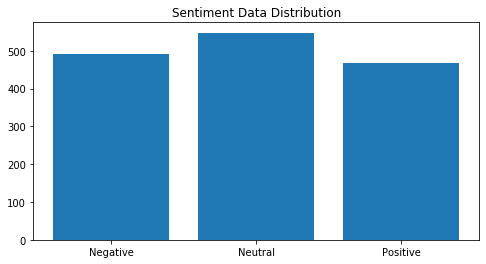

In [14]:
plt.figure(figsize=(8,4))
count_pos = new_inputs['Label'].value_counts()[1]
count_ntl = new_inputs['Label'].value_counts()[0]
count_neg = new_inputs['Label'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

The distribution of all categories is almost uniform, which is good for training purposes.

In [15]:
def split(new_inputs):

    train_data = new_inputs[:int(len(new_inputs)*0.7)]
    test_data = new_inputs[int(len(new_inputs)*0.7):int(len(new_inputs)*0.8)]
    val_data = new_inputs[int(len(new_inputs)*0.8):]

    #Convert to ndarray
    
    train_data = np.asarray(train_data)
    test_data = np.asarray(test_data)
    val_data = np.asarray(val_data)


    return train_data, test_data, val_data

train_data, test_data, val_data = split(new_inputs)
print(train_data[0])
print(test_data.shape[0])
print(val_data.shape[0])

[1.         0.         0.1394424  0.463      2.66339804 1.75690624
 0.        ]
151
302


In [16]:
def data_prep(train_data):
    
    x_train = []
    y_train = []

    for i in range(train_data.shape[0]):

        x_train.append(train_data[i][:6])
        y_train.append(train_data[i][6:])

    x_train = np.array(x_train) 
    y_train = np.array(y_train)

    return x_train, y_train

x_train, y_train = data_prep(train_data)
x_test, y_test = data_prep(test_data)
x_val, y_val = data_prep(val_data)

We one-hot encode our label to form the output vector.

In [17]:
def label_encoding(y_train, y_test, y_val):

    from keras.utils.np_utils import to_categorical
    y_train = to_categorical(y_train, num_classes=3)
    y_test = to_categorical(y_test, num_classes=3)
    y_val = to_categorical(y_val, num_classes=3)
    
    return y_train, y_test, y_val

y_train, y_test, y_val = label_encoding(y_train, y_test, y_val)

In [18]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1054, 6)
y_train shape: (1054, 3)
y_test shape: (151, 3)


We now make the model for training.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 755
Trainable params: 755
Non-trainable params: 0
_________________________________________________________________


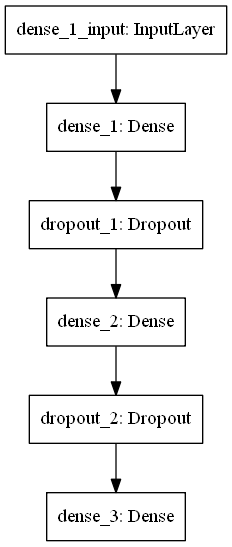

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def create_model(x_train, units_1, units_2):
    
    # Neural network
    model = Sequential()
    model.add(Dense(16, input_dim=6, activation= 'relu', kernel_initializer='glorot_uniform',))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation= 'softmax'))

    return model
    
    
model = create_model(x_train, 16, 32)

model.summary()

plot_model(model, to_file='model.png')

In [20]:
def compile_model(model, x_train, y_train, x_test, y_test):
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_test, y_test), verbose = 0, )
    return history

history = compile_model(model, x_train, y_train, x_test, y_test)

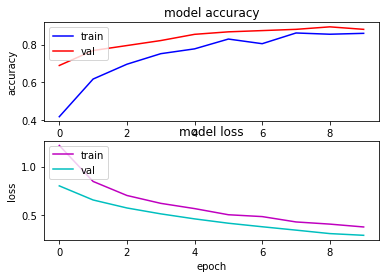

In [21]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['train', 'val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [22]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        #print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        #print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        #print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
y_pred_1d = [decode_sentiment(score) for score in scores]
temp = [decode_sentiment(score) for score in y_test]

151/151 [==============================] - 0s 396us/step


In [23]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

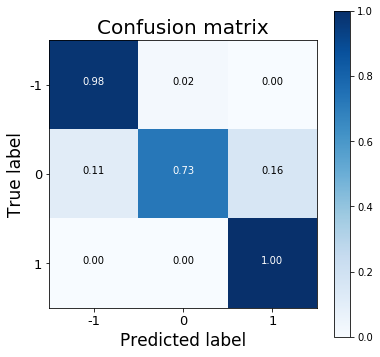

In [24]:
cnf_matrix = confusion_matrix(temp, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1], title="Confusion matrix")
plt.show()

In [25]:
print(classification_report(list(temp), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93        51
           0       0.98      0.73      0.83        62
           1       0.79      1.00      0.88        38

    accuracy                           0.88       151
   macro avg       0.88      0.90      0.88       151
weighted avg       0.90      0.88      0.88       151



In [26]:
output = inputs[int(len(new_inputs)*0.7):]
output.head()

,Unnamed: 0,Date,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,52-week low,MACD,MACD Signal,MACD Trend,Score,Close,Label,Diff,RSI change,21 SMA change
1054,1054,2019-01-14,168.42392,168.7469,166.809619,169.032334,166.843060,167.878406,53.117443,444095.238095,...,149.6151,-0.399392,-0.810558,Bullish,0.090909,168.7469,1.0,1.0,2.049226,0.058681
1055,1055,2019-01-15,167.93489,170.2205,166.929852,169.192438,166.799052,167.844875,55.862526,425323.809524,...,149.6151,-0.100500,-0.668546,Bullish,0.000000,170.2205,1.0,0.0,2.745083,0.120233
1056,1056,2019-01-16,169.46535,168.4884,166.980329,169.297462,166.753515,167.801384,52.007824,430485.714286,...,149.6151,-0.003353,-0.535508,Bullish,0.000000,168.4884,-1.0,1.0,-3.854703,0.050476
1057,1057,2019-01-17,169.74330,168.3677,166.838343,169.303966,166.717243,167.756276,51.739898,414257.142857,...,149.6151,0.063169,-0.415772,Bullish,0.181818,168.3677,0.0,0.0,-0.267926,-0.141986
1058,1058,2019-01-18,169.06622,168.7211,166.721805,169.325476,166.705027,167.727585,52.511299,380319.047619,...,149.6151,0.142758,-0.304066,Bullish,0.000000,168.7211,0.0,0.0,0.771401,-0.116538


In [27]:
scores = model.predict(x_test, verbose=1, batch_size=10)
x = [decode_sentiment(score) for score in scores]

scores = model.predict(x_val, verbose=1, batch_size=10)
y = [decode_sentiment(score) for score in scores]


pred = np.concatenate((x, y))

output = output.iloc[1:]

output['Pred'] = pred
output.tail(10)


302/302 [==============================] - 0s 60us/step


,Unnamed: 0,Date,Predicted Price,Original Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,MACD,MACD Signal,MACD Trend,Score,Close,Label,Diff,RSI change,21 SMA change,Pred
1498,1498,2020-09-25,178.62714,176.70,175.497143,175.1946,166.120859,171.955316,52.930152,505521.761905,...,1.090664,1.152979,Bearish,-0.500000,176.70,0.0,1.0,-2.452571,0.142857,-1
1499,1499,2020-09-28,177.25554,174.31,175.616190,175.3790,166.353900,171.853115,46.329358,478585.190476,...,0.803867,1.083157,Bearish,-0.666667,174.31,-1.0,-1.0,-6.600793,0.119048,-1
1500,1500,2020-09-29,175.62607,175.13,175.809524,175.5738,166.565600,171.750628,48.693461,482864.857143,...,0.635420,0.993609,Bearish,-0.050000,175.13,1.0,-1.0,2.364103,0.193333,1
1501,1501,2020-09-30,177.05559,173.82,175.890476,175.7088,166.749500,171.641592,45.263275,460799.000000,...,0.391704,0.873228,Bearish,-0.100000,173.82,-1.0,1.0,-3.430186,0.080952,-1
1502,1502,2020-10-01,175.07462,177.02,176.125714,175.8696,166.968200,171.530164,53.820943,463111.285714,...,0.451565,0.788896,Bearish,-0.142857,177.02,1.0,-1.0,8.557668,0.235238,1
1503,1503,2020-10-02,174.38283,175.71,176.220000,175.9516,167.197000,171.423457,50.350489,456452.380952,...,0.388817,0.708880,Bearish,0.000000,175.71,-1.0,-1.0,-3.470454,0.094286,-1
1504,1504,2020-10-05,176.19630,172.58,176.218571,175.9194,167.430300,171.319208,43.185285,441982.809524,...,0.085538,0.584211,Bearish,0.000000,172.58,-1.0,1.0,-7.165204,-0.001429,-1
1505,1505,2020-10-06,175.16805,171.74,176.126667,175.8138,167.653000,171.211466,41.479298,442901.285714,...,-0.220057,0.423358,Bearish,0.000000,171.74,-1.0,-1.0,-1.705988,-0.091905,-1
1506,1506,2020-10-07,172.90756,174.64,176.301905,175.7614,167.901000,171.099928,48.973708,450087.095238,...,-0.225637,0.293559,Bearish,-0.222222,174.64,1.0,-1.0,7.494411,0.175238,1
1507,1507,2020-10-08,175.75190,175.44,176.466190,175.7222,168.165700,170.970084,50.843883,452801.666667,...,-0.163619,0.202123,Bearish,0.000000,175.44,0.0,1.0,1.870175,0.164286,1


## Run on 100 companies

In [ ]:
KSE100 = pd.read_csv('Input/KSE100.csv')
KSE100.head()
for i in range(73, len(KSE100)):
    
    name = KSE100['Ticker'][i]
    print(i)
    print(name)
    inputs = pd.read_csv('Input/' + name + '.csv')
    inputs = inputs.rename(columns={"14 RSI": "RSI"})
    inputs = correct_dtype(inputs)
    inputs = difference(inputs)
    inputs = labelling(inputs)
    new_inputs = final_df(inputs)
    
    train_data, test_data, val_data = split(new_inputs)
    x_train, y_train = data_prep(train_data)
    x_test, y_test = data_prep(test_data)
    x_val, y_val = data_prep(val_data)
    y_train, y_test, y_val = label_encoding(y_train, y_test, y_val)
    
    model = create_model(x_train, 16, 32)
    history = compile_model(model, x_train, y_train, x_test, y_test)
    model.save('Models/' + name + '.h5')
    model = tf.keras.models.load_model('Models/' + name + '.h5')
    
    output = inputs[int(len(new_inputs)*0.7):]
    
    scores = model.predict(x_test, verbose=1, batch_size=10)
    x = [decode_sentiment(score) for score in scores]

    scores = model.predict(x_val, verbose=1, batch_size=10)
    y = [decode_sentiment(score) for score in scores]
    
    pred = np.concatenate((x, y))

    output = output.iloc[1:]

    output['Pred'] = pred
    
    output.to_csv('Output/' + name + '.csv')
    